In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('glass.csv')

In [4]:
for col in df.columns:
    if df[col].dtype==object:
        df[col]=df[col].astype('category')
        df[col]=df[col].cat.codes

In [5]:
X = df.loc[:,df.columns != 'Type']
y = df['Type']

In [7]:
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train = X_train.values
X_test = X_test.values

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(  100, 100, 100, 100, 100, 100, 100, 100),activation='tanh', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

mlp.classes_

array([1, 2, 3, 5, 6, 7])

In [14]:
print(mlp.coefs_)

[array([[-4.03040637e-03,  1.30471533e-02, -5.78653826e-02,
         8.15794659e-02, -1.68013754e-01, -1.99441550e-02,
        -4.73231921e-02,  2.26974490e-02, -1.34275029e-04,
         2.55972524e-01, -2.37566364e-01,  5.11958877e-02,
        -1.34510603e-01,  2.51567060e-01,  6.89407439e-02,
        -1.28951057e-01, -1.58047651e-01,  1.06135319e-01,
         5.58656011e-02, -1.39093848e-01,  5.49402040e-03,
         4.57182421e-03, -3.13322106e-02, -2.18543977e-02,
         1.01530829e-02,  4.82426798e-04, -1.26525602e-01,
        -2.21770916e-02,  1.38653430e-02, -3.51403174e-03,
         1.05258793e-03, -1.26715209e-01, -6.18100585e-03,
        -9.17754716e-03, -1.74382407e-02, -9.55377113e-02,
         1.25201354e-01, -6.63985064e-02, -1.73293242e-02,
         9.69170931e-02,  2.12973558e-01,  1.18508630e-01,
         5.52414379e-02, -1.07765139e-02, -1.06252116e-01,
        -1.22933424e-01, -1.85861569e-01,  1.06938880e-02,
        -1.89532999e-02, -1.27397602e-01, -9.71748812e-

In [15]:
predictions = mlp.predict(X_test)
from sklearn.metrics import accuracy_score

In [31]:
X_test

array([[1.51674e+00, 1.27900e+01, 3.52000e+00, 1.54000e+00, 7.33600e+01,
        6.60000e-01, 7.90000e+00, 0.00000e+00, 0.00000e+00],
       [1.52099e+00, 1.36900e+01, 3.59000e+00, 1.12000e+00, 7.19600e+01,
        9.00000e-02, 9.40000e+00, 0.00000e+00, 0.00000e+00],
       [1.51860e+00, 1.33600e+01, 3.43000e+00, 1.43000e+00, 7.22600e+01,
        5.10000e-01, 8.60000e+00, 0.00000e+00, 0.00000e+00],
       [1.51736e+00, 1.27800e+01, 3.62000e+00, 1.29000e+00, 7.27900e+01,
        5.90000e-01, 8.70000e+00, 0.00000e+00, 0.00000e+00],
       [1.52227e+00, 1.41700e+01, 3.81000e+00, 7.80000e-01, 7.13500e+01,
        0.00000e+00, 9.69000e+00, 0.00000e+00, 0.00000e+00],
       [1.51869e+00, 1.31900e+01, 3.37000e+00, 1.18000e+00, 7.27200e+01,
        5.70000e-01, 8.83000e+00, 0.00000e+00, 1.60000e-01],
       [1.51743e+00, 1.22000e+01, 3.25000e+00, 1.16000e+00, 7.35500e+01,
        6.20000e-01, 8.90000e+00, 0.00000e+00, 2.40000e-01],
       [1.51763e+00, 1.28000e+01, 3.66000e+00, 1.27000e+00, 7.

In [24]:
predictions

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 6, 1, 2,
       2, 7, 2, 6, 7, 1, 1, 2, 7, 1, 1, 6, 1, 7, 1, 1, 1, 1, 2, 7, 5, 2,
       1, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 6, 2, 2, 1, 1, 7, 2, 1,
       2, 1, 1, 5, 6])

In [21]:
import matplotlib.pyplot as plt

In [22]:
print("The accuracy is %s" %(accuracy_score(y_test,predictions)))

The accuracy is 0.6056338028169014


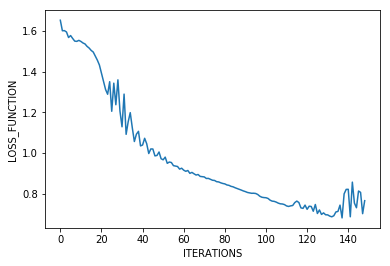

In [30]:
plt.ylabel('LOSS_FUNCTION')
plt.xlabel('ITERATIONS')

plt.plot(mlp.loss_curve_)
plt.show()